# Visualizing Geographic Data by using Basemap and Folium

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
airlines=pd.read_csv('airlines.csv')
airports=pd.read_csv('airports.csv')
routes=pd.read_csv('routes.csv')

In [3]:
airlines.head(2)

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N


In [4]:
airports.head(2)

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby


In [5]:
routes.head(2)

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2


# Creating map visualization using Basemap

In [6]:
##Creating a new basemap instance
m=Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_0=0,lon_0=0,resolution='c')

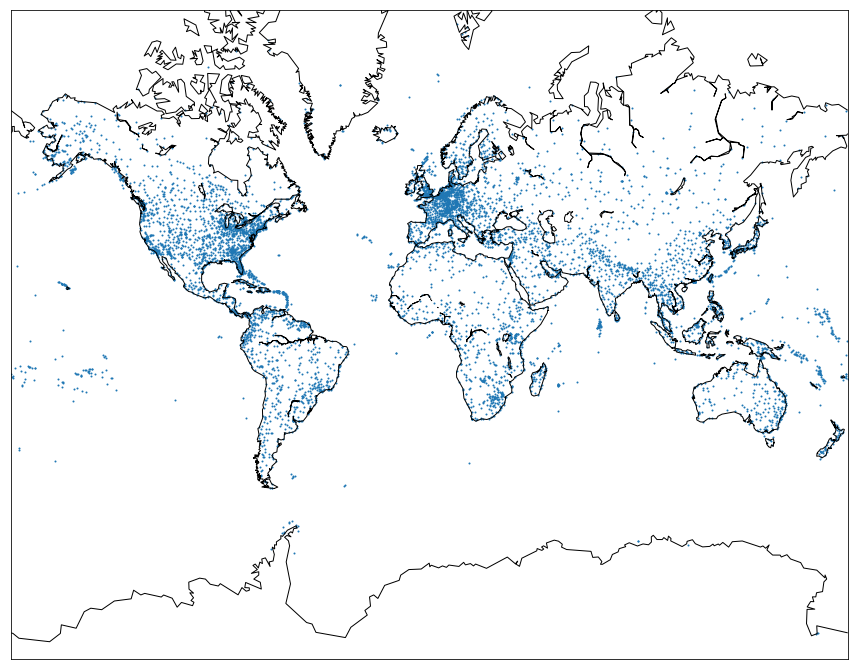

In [7]:
##Convet latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map
##The constructor only accepts list values, so we need to convert the longitude and latitude clumns from airports datafame to lists.
fig,ax=plt.subplots(figsize=(15,20))
longitudes=airports['longitude'].tolist()
latitudes=airports['latitude'].tolist()
x,y=m(longitudes,latitudes)
m.scatter(x,y,s=1)
m.drawcoastlines()

___
### Great Circles

In [8]:
##To better understand the flight routes, we can draw great circles to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.
geo_routes=pd.read_csv('geo_routes.csv')

In [9]:
geo_routes.head(5)

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


In [10]:
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


In [11]:
##basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values. This is because the basemap.drawgreatcircle() method isn't able to create great circles properly when they go outside of the map boundaries.
##Creating a function that draws a great circle for each rout that has an absolute difference in the latitude and longitude values less than 180.
def create_great_circles(df):
    for index,row in df.iterrows():
        start_lat,end_lat=row['start_lat'],row['end_lat']
        start_lon,end_lon=row['start_lon'],row['end_lon']
        if abs(end_lat-start_lat)<180 and abs(end_lon-start_lon)<180:
            m.drawgreatcircle(start_lon,start_lat,end_lon,end_lat,linewidth=2)

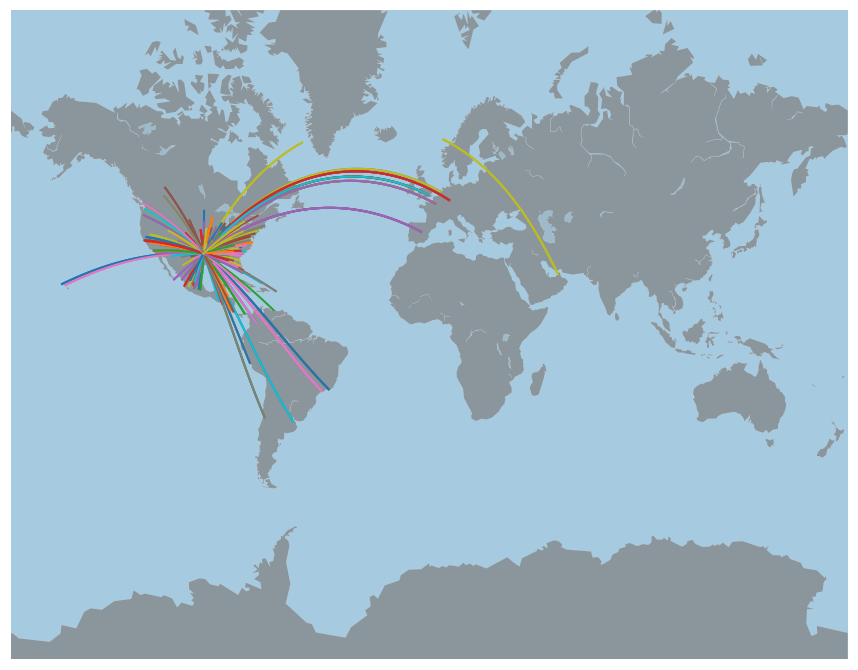

In [12]:
##start at the DFW airport
fig,ax=plt.subplots(figsize=(15,20))
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey',alpha=0.7)
m.drawcoastlines(linewidth=0.1,color='white')
dfw=geo_routes[geo_routes['source']=='DFW']
create_great_circles(dfw)

In [13]:
airports[airports['city']=='Rome'].head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
1527,1553,Ciampino,Rome,Italy,CIA,LIRA,41.799361,12.594936,427,1.0,E,Europe/Rome
1529,1555,Fiumicino,Rome,Italy,FCO,LIRF,41.804475,12.250797,15,1.0,E,Europe/Rome
1538,1565,Urbe,Rome,Italy,NaN,LIRU,41.951946,12.498889,55,1.0,E,Europe/Rome
3351,3450,Griffiss Afld,Rome,United States,RME,KRME,43.233800,-75.407033,504,-5.0,A,America/New_York
6596,8023,Roma Termini,Rome,Italy,NaN,\N,41.900481,12.502001,189,1.0,E,Europe/Rome


In [14]:
airports[airports['city']=='New York'].head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
3598,3697,La Guardia,New York,United States,LGA,KLGA,40.777245,-73.872608,22,-5.0,A,America/New_York
3698,3797,John F Kennedy Intl,New York,United States,JFK,KJFK,40.639751,-73.778925,13,-5.0,A,America/New_York
3885,3993,Wall Street Heliport,New York,United States,JRB,KJRB,40.701214,-74.009028,7,-5.0,A,America/New_York
3924,4032,East 34th Street Heliport,New York,United States,TSS,NONE,40.742500,-73.971944,10,-5.0,A,America/New_York
5541,6966,Penn Station,New York,United States,ZYP,\N,40.750500,-73.993500,35,-5.0,A,America/New_York


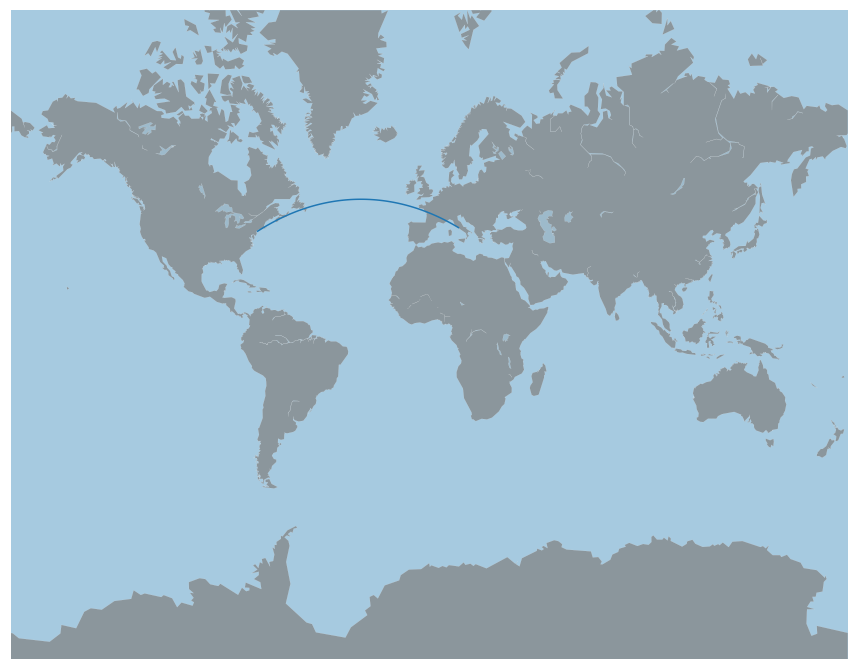

In [15]:
## From New York to London
fig,ax=plt.subplots(figsize=(15,20))
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey',alpha=0.7)
m.drawcoastlines(linewidth=0.1,color='white')
m.drawgreatcircle(12.594936,41.799361,-73.778925,40.639751)

# Creating interactive map visualization using Folium

In [16]:
import folium

In [17]:
data=pd.DataFrame({
    'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
map=folium.Map(location=[10,0],tiles='Mapbox Bright',zoom_start=2)
for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=data.iloc[i]['name']).add_to(map)

In [18]:
map

In [19]:
map.save('map.html')

In [20]:
cities=['San Francisco','New York','Seattle','Los Angeles','Washington','Phoenix','Denver','Boston','Jackson','Las Vegas','Chicago']
new=airports[airports['city'].isin(cities)]
new=new.reset_index(drop=True)
airportMap=folium.Map(location=[35, -93], zoom_start=4)
for i in range(0,len(new)):
    folium.Marker([new.iloc[i]['latitude'],new.iloc[i]['longitude']],popup=new.iloc[i]['name'],icon=folium.Icon(color='green')).add_to(airportMap)

In [21]:
airportMap

In [22]:
airportMap.save('airportMap.html')